In [1]:
import torch
import torch.nn as nn

import numpy as np 
import matplotlib.pyplot as plt

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import SingleLetterAlphabet

from transformers import AutoTokenizer, AutoModel, EsmForProteinFolding

import os
import copy
from tqdm import tqdm

from quant import *

In [11]:
import seaborn as sns
sns.set(color_codes=True)

In [2]:
tokenizer = AutoTokenizer.from_pretrained("facebook/esmfold_v1")
origin_model = EsmForProteinFolding.from_pretrained("facebook/esmfold_v1", low_cpu_mem_usage=True)
quant_model = torch.load("quant_weis/quant_model_v1_2.pt")

origin_model = origin_model.cuda("cuda:2")
origin_model.esm = origin_model.esm.float()
quant_model = quant_model.cuda("cuda:2")
quant_model.esm = quant_model.esm.float()

In [3]:
weights = []

weight1 = origin_model.state_dict()["esm.encoder.layer.0.attention.self.query.weight"].flatten().tolist()
len(weight1)

6553600

In [4]:
quant_model.state_dict()["esm.encoder.layer.35.LayerNorm.weight"].size()

torch.Size([2560])

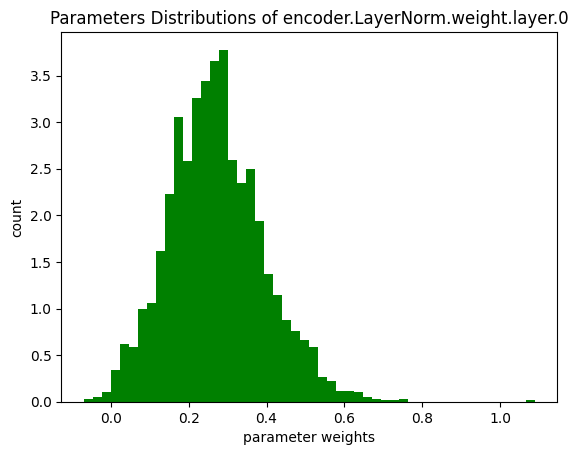

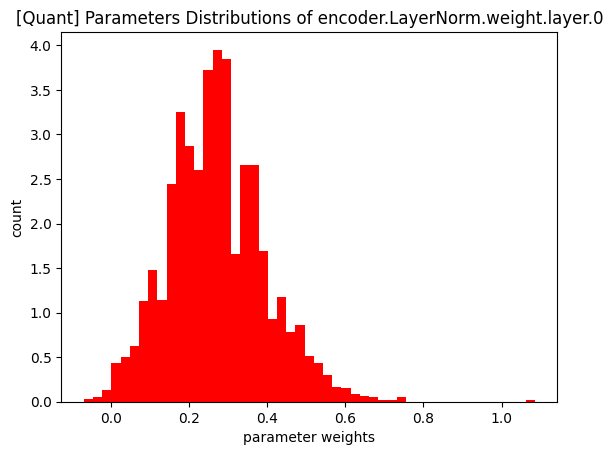

In [8]:
weight1_1 = origin_model.state_dict()["esm.encoder.layer.0.LayerNorm.weight"].flatten().tolist()
weight1_2 = quant_model.state_dict()["esm.encoder.layer.0.LayerNorm.weight"].flatten().tolist()

plt.hist(weight1_1, bins='auto', density=True, facecolor='g')
plt.xlabel("parameter weights")
plt.ylabel("count")
plt.title("Parameters Distributions of encoder.LayerNorm.weight.layer.0")
plt.show()

plt.hist(weight1_2, bins='auto', density=True, facecolor='r')
plt.xlabel("parameter weights")
plt.ylabel("count")
plt.title("[Quant] Parameters Distributions of encoder.LayerNorm.weight.layer.0")
plt.show()

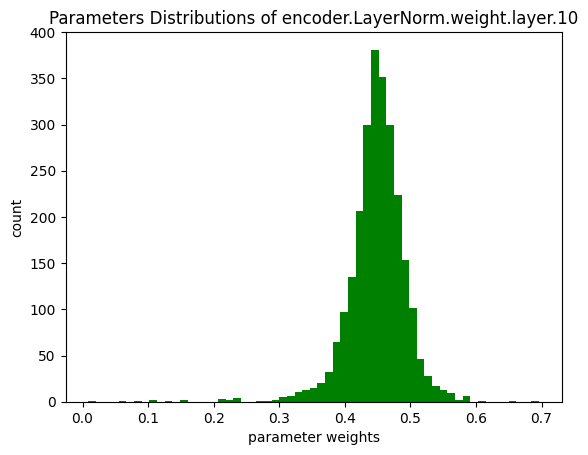

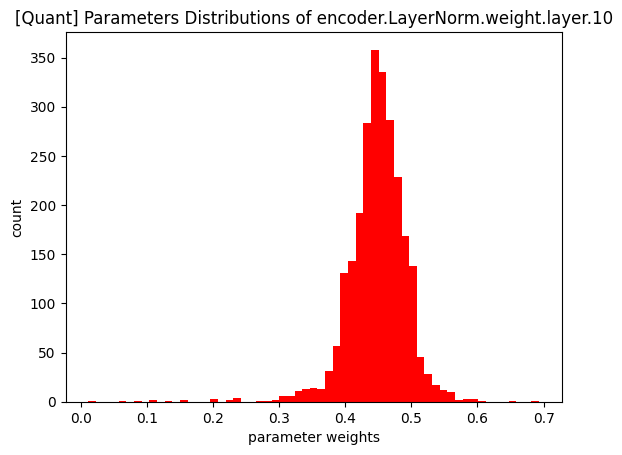

In [7]:
weight1_1 = origin_model.state_dict()["esm.encoder.layer.10.LayerNorm.weight"].flatten().tolist()
weight1_2 = quant_model.state_dict()["esm.encoder.layer.10.LayerNorm.weight"].flatten().tolist()

plt.hist(weight1_1, bins='scott', density=False, facecolor='g')
plt.xlabel("parameter weights")
plt.ylabel("count")
plt.title("Parameters Distributions of encoder.LayerNorm.weight.layer.10")
plt.show()

plt.hist(weight1_2, bins='scott', density=False, facecolor='r')
plt.xlabel("parameter weights")
plt.ylabel("count")
plt.title("[Quant] Parameters Distributions of encoder.LayerNorm.weight.layer.10")
plt.show()

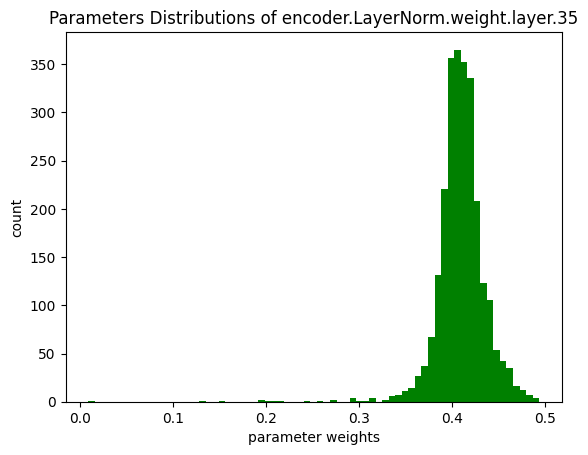

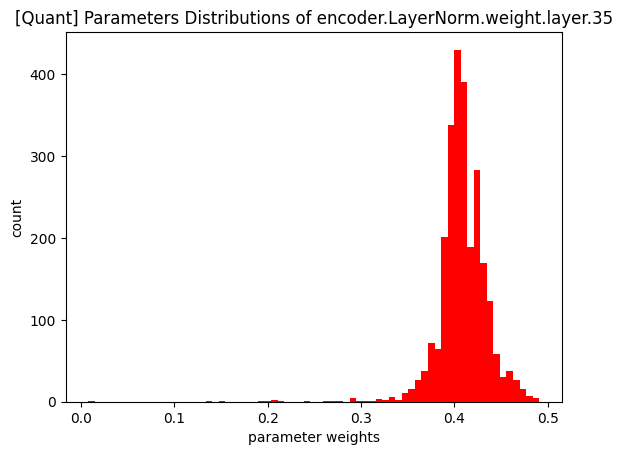

In [5]:
weight1_1 = origin_model.state_dict()["esm.encoder.layer.35.LayerNorm.weight"].flatten().tolist()
weight1_2 = quant_model.state_dict()["esm.encoder.layer.35.LayerNorm.weight"].flatten().tolist()

plt.hist(weight1_1, bins='scott', density=False, facecolor='g')
plt.xlabel("parameter weights")
plt.ylabel("count")
plt.title("Parameters Distributions of encoder.LayerNorm.weight.layer.35")
plt.show()

plt.hist(weight1_2, bins='scott', density=False, facecolor='r')
plt.xlabel("parameter weights")
plt.ylabel("count")
plt.title("[Quant] Parameters Distributions of encoder.LayerNorm.weight.layer.35")
plt.show()